<a href="https://colab.research.google.com/github/xrjiang83/learn_d2l/blob/master/Learn_D2L_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mxnet

In [2]:
from mxnet import nd
from time import time
a = nd.ones(shape=1000)
b = nd.ones(shape=1000)
c = nd.zeros(shape=1000)
start1 = time()
for i in range(1000) : 
  c[i] = a[i] + b[i]
print(time() - start1)
start2 = time()
d = a + b
print(time() - start2)

0.16320085525512695
0.0006098747253417969


In [0]:
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random
# randomly generate a dataset
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [0]:
def use_svg_display() : 
  display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)) : 
  use_svg_display()
  plt.rcParams['figure.figsize'] = figsize


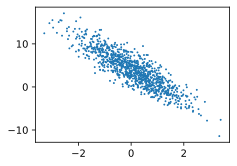

In [5]:
set_figsize()
plt.scatter(features[:,1].asnumpy(), labels.asnumpy(), 1); # add the semicolon to show the figure only

In [0]:
# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)  # take函数根据索引返回对应元素

In [0]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))
w.attach_grad()
b.attach_grad()

In [0]:
def linreg(X, w, b):  # 本函数已保存在d2lzh包中方便以后使用
    return nd.dot(X, w) + b

In [0]:
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh包中方便以后使用
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [0]:
# 定义随机梯度下降函数
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh包中方便以后使用
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [11]:
batch_size = 10
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.040582
epoch 2, loss 0.000156
epoch 3, loss 0.000051


In [0]:
####################################################################################################################
##### Sect. 3.3 Below ##########################################################################################
####################################################################################################################

In [0]:
from mxnet import autograd, nd

num_inputs = 2
num_examples = 995
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [0]:
from mxnet.gluon import data as gdata

batch_size = 10
# 将训练数据的特征和标签组合
dataset = gdata.ArrayDataset(features, labels)
# 随机读取小批量
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

In [0]:
# 定义模型
from mxnet.gluon import nn

net = nn.Sequential()
net.add(nn.Dense(1))

In [0]:
# 初始化模型参数
from mxnet import init

net.initialize(init.Normal(sigma=0.01))

In [0]:
# 定义损失函数
from mxnet.gluon import loss as gloss

loss = gloss.L2Loss()

In [0]:
# 定义优化算法
from mxnet import gluon 

trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

In [19]:
# 训练模型
num_epochs = 3
for epoch in range(1, num_epochs+1) : 
  for X, y in data_iter : 
    with autograd.record() : 
      l = loss(net(X), y)
    l.backward()
    trainer.step(batch_size)
  l = loss(net(features), labels)
  print("epoch %d, loss: %f" % (epoch, l.mean().asnumpy()))


epoch 1, loss: 0.034742
epoch 2, loss: 0.000123
epoch 3, loss: 0.000050


In [0]:
#####################################################################################
######## Sect. 3.5 and 3.6 Below ##############################################
#####################################################################################

In [21]:
%matplotlib inline
from mxnet.gluon import data as gdata
import sys
import time

mnist_train = gdata.vision.FashionMNIST(train=True)
mnist_test = gdata.vision.FashionMNIST(train=False)

len(mnist_train), len(mnist_test)

(60000, 10000)

In [22]:
feature, label = mnist_train[0]
feature.shape, feature.dtype

((28, 28, 1), numpy.uint8)

In [23]:
label, type(label), label.dtype

(2, numpy.int32, dtype('int32'))

In [0]:
# 本函数保存在d2lzh包中方便以后使用
def get_fashion_mnist_labels(labels) : 
  text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
  return [text_labels[int(i)] for i in labels]


In [0]:
# 本函数保存在d2lzh包中方便以后使用
def show_fashion_mnist(images, labels):
    use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).asnumpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

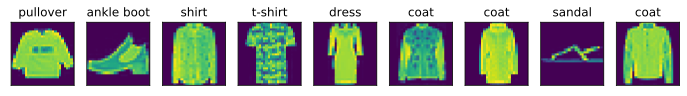

In [26]:
X, y = mnist_train[0:9]
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [0]:
import os
from mxnet.gluon import data as gdata

def load_data_fashion_mnist(batch_size, resize=None, root=os.path.join(
        '~', '.mxnet', 'datasets', 'fashion-mnist')):
    """Download the fashion mnist dataset and then load into memory."""
    root = os.path.expanduser(root)
    transformer = []
    if resize:
        transformer += [gdata.vision.transforms.Resize(resize)]
    transformer += [gdata.vision.transforms.ToTensor()]
    transformer = gdata.vision.transforms.Compose(transformer)

    mnist_train = gdata.vision.FashionMNIST(root=root, train=True)
    mnist_test = gdata.vision.FashionMNIST(root=root, train=False)
    num_workers = 0 if sys.platform.startswith('win32') else 2

    train_iter = gdata.DataLoader(mnist_train.transform_first(transformer),
                                  batch_size, shuffle=True,
                                  num_workers=num_workers)
    test_iter = gdata.DataLoader(mnist_test.transform_first(transformer),
                                 batch_size, shuffle=False,
                                 num_workers=num_workers)
    return train_iter, test_iter

In [28]:
# 读取训练数据所需的时间
import time

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size) 
start = time.time()
for X, y in train_iter :
  continue
'%.2f sec' % (time.time() - start)

'3.61 sec'

In [29]:
for X, y in train_iter :
  print(X.shape, y.shape) 
  break;

(256, 1, 28, 28) (256,)


In [0]:
##############################################################################################
######## Sect. 3.6 Below #################################################################
##############################################################################################

In [0]:
import sys
import os 
import time

# 读取数据集
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size) 

# 初始化模型参数
num_inputs = 784
num_outputs = 10
W = nd.random.normal(scale=0.01, shape=(num_inputs, num_outputs))
b = nd.zeros(num_outputs)
W.attach_grad()
b.attach_grad()

In [32]:
W


[[-4.83627617e-03 -9.21402965e-03  2.53837602e-03 ... -5.89813571e-03
   8.10974371e-03 -5.23070898e-03]
 [ 1.12914741e-02  3.92688438e-04  1.65568630e-03 ... -6.34230115e-03
  -1.22258335e-03  5.42999804e-03]
 [-9.46935173e-03  5.96433040e-03  7.90703669e-03 ... -1.79335214e-02
  -3.69663117e-03  1.65157970e-02]
 ...
 [ 7.16084335e-03 -1.48858363e-02  1.59336086e-02 ...  6.20343257e-03
   6.53620530e-03 -3.52914026e-03]
 [-2.51065241e-03  1.38896573e-02 -1.53285675e-02 ... -2.01650523e-02
  -9.52582434e-03  2.50978395e-03]
 [-1.18692117e-02  1.19075924e-03  4.90005547e-03 ...  4.05345066e-03
   1.36841787e-03 -4.33261557e-05]]
<NDArray 784x10 @cpu(0)>

In [0]:
# 实现softmax运算
def softmax(X) : 
  X_exp = X.exp()
  partition = X_exp.sum(axis=1, keepdims=True)
  return X_exp / partition


In [0]:
# 定义模型
def net(X) :
  return softmax(nd.dot(X.reshape((-1, num_inputs)), W) + b)

In [0]:
# 定义损失函数
def cross_entropy(y_hat, y) :
  return -nd.pick(y_hat, y).log()

In [0]:
# 计算分类准确率
def evaluate_accuracy(data_iter, net) : 
  acc_sum, n = 0.0, 0
  for X, y in data_iter : 
    y = y.astype('float32')
    acc_sum += (net(X).argmax(axis=1) == y).sum().asscalar()
    n += y.size
  return acc_sum / n

In [0]:
# 训练模型
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, trainer=None) : 
  for epoch in range(num_epochs) : 
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter : 
      with autograd.record() : 
        y_hat = net(X)
        l = loss(y_hat, y).sum()
      l.backward()
      if trainer is None: 
        sgd(params, lr, batch_size)
      else :
        trainer.step(batch_size)
      y = y.astype('float32')
      train_l_sum += l.asscalar()
      train_acc_sum += (y_hat.argmax(axis=1) == y).sum().asscalar()
      n += y.size
    test_acc = evaluate_accuracy(test_iter, net)
    print('epoch %d, loss %.4f, train_acc %.3f, test acc %.3f' % (epoch+1, train_l_sum / n, train_acc_sum / n, test_acc))

In [38]:
# 在MNIST_FASHION数据集上训练
from mxnet import autograd

num_epochs, lr = 5, 0.1
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W,b], lr)

epoch 1, loss 0.7903, train_acc 0.744, test acc 0.796
epoch 2, loss 0.5730, train_acc 0.810, test acc 0.823
epoch 3, loss 0.5283, train_acc 0.824, test acc 0.831
epoch 4, loss 0.5049, train_acc 0.831, test acc 0.838
epoch 5, loss 0.4889, train_acc 0.834, test acc 0.838


In [0]:
###########################################################################################
######### Sect. 3.7 Below #############################################################
###########################################################################################

In [40]:
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn

# 读取数据集
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

# 定义和初始化模型
net = nn.Sequential()
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

# softmax和交叉熵函数
loss = gloss.SoftmaxCrossEntropyLoss()

# 定义优化算法
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

# 训练模型
num_epochs = 5
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)

epoch 1, loss 0.7859, train_acc 0.750, test acc 0.807
epoch 2, loss 0.5738, train_acc 0.812, test acc 0.822
epoch 3, loss 0.5281, train_acc 0.824, test acc 0.828
epoch 4, loss 0.5055, train_acc 0.831, test acc 0.837
epoch 5, loss 0.4894, train_acc 0.834, test acc 0.842


In [0]:
#############################################################################################
######## Sect. 3.9 Below ################################################################
#############################################################################################

In [42]:
# 多层感知机的从零开始实现
from mxnet import nd
from mxnet.gluon import loss as gloss, nn

# 读取数据集
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

# 定义模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 64
W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens))
b1 = nd.zeros(num_hiddens)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens, num_outputs))
b2 = nd.zeros(num_outputs)
params = [W1, b1, W2, b2]
for param in params : 
  param.attach_grad()

# 定义激活函数
def relu(X) : 
  return nd.maximum(X, 0)

# 定义模型
def MLP(X) : 
  X = X.reshape((-1, num_inputs))
  H = relu(nd.dot(X, W1) + b1)
  return nd.dot(H, W2) + b2

# 定义损失函数
cross_entropy_loss = gloss.SoftmaxCrossEntropyLoss()

# 训练模型
num_epochs, lr = 10, 0.5
train_ch3(MLP, train_iter, test_iter, cross_entropy_loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.8694, train_acc 0.675, test acc 0.821
epoch 2, loss 0.5195, train_acc 0.808, test acc 0.825
epoch 3, loss 0.4653, train_acc 0.828, test acc 0.854
epoch 4, loss 0.4198, train_acc 0.845, test acc 0.860
epoch 5, loss 0.4022, train_acc 0.852, test acc 0.862
epoch 6, loss 0.3869, train_acc 0.858, test acc 0.869
epoch 7, loss 0.3752, train_acc 0.863, test acc 0.872
epoch 8, loss 0.3597, train_acc 0.867, test acc 0.870
epoch 9, loss 0.3477, train_acc 0.872, test acc 0.877
epoch 10, loss 0.3393, train_acc 0.876, test acc 0.878


In [43]:
# 练习：增加一个隐藏层
# 定义模型参数
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 64
W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens1))
b1 = nd.zeros(num_hiddens1)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens1, num_hiddens2))
b2 = nd.zeros(num_hiddens2)
W3 = nd.random.normal(scale=0.01, shape=(num_hiddens2, num_outputs))
b3 = nd.zeros(num_outputs)

params = [W1, b1, W2, b2, W3, b3]
for param in params : 
  param.attach_grad()

# 定义模型
def deep_MLP(X) : 
  X = X.reshape((-1, num_inputs))
  H1 = relu(nd.dot(X, W1) + b1)
  H2 = relu(nd.dot(H1, W2) + b2)
  return nd.dot(H2, W3) + b3

# 训练模型
num_epochs, lr = 10, 0.5
train_ch3(deep_MLP, train_iter, test_iter, cross_entropy_loss, num_epochs, batch_size, params, lr)

epoch 1, loss 1.2702, train_acc 0.500, test acc 0.770
epoch 2, loss 0.6046, train_acc 0.769, test acc 0.830
epoch 3, loss 0.4829, train_acc 0.820, test acc 0.839
epoch 4, loss 0.4314, train_acc 0.838, test acc 0.861
epoch 5, loss 0.4015, train_acc 0.850, test acc 0.862
epoch 6, loss 0.3756, train_acc 0.861, test acc 0.866
epoch 7, loss 0.3578, train_acc 0.867, test acc 0.868
epoch 8, loss 0.3435, train_acc 0.872, test acc 0.856
epoch 9, loss 0.3329, train_acc 0.877, test acc 0.877
epoch 10, loss 0.3209, train_acc 0.881, test acc 0.876


In [44]:
for X, y in train_iter :
  X = X.reshape((-1, num_inputs))
  H1 = relu(nd.dot(X, W1) + b1)
  print(H1.shape)
  H2 = relu(nd.dot(H1, W2) + b2)
  print(H2.shape)
  O = nd.dot(H2, W3) + b3
  print(O.shape)
  break

(256, 256)
(256, 64)
(256, 10)


In [0]:
##################################################################################################
########## Sect. 3.10 Below ##################################################################
##################################################################################################

In [46]:
# 多层感知机的简洁实现
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn

# 定义模型
mlp = nn.Sequential()
mlp.add(nn.Dense(256, activation='relu'), nn.Dense(64, activation='relu'), nn.Dense(10))
mlp.initialize(init.Normal(sigma=0.01))

# 训练模型
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)
loss = gloss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(mlp.collect_params(), 'sgd', {'learning_rate': 0.5})
num_epochs = 10
train_ch3(mlp, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)


epoch 1, loss 1.2038, train_acc 0.525, test acc 0.772
epoch 2, loss 0.5650, train_acc 0.790, test acc 0.836
epoch 3, loss 0.4645, train_acc 0.829, test acc 0.831
epoch 4, loss 0.4234, train_acc 0.843, test acc 0.852
epoch 5, loss 0.3882, train_acc 0.857, test acc 0.864
epoch 6, loss 0.3639, train_acc 0.864, test acc 0.866
epoch 7, loss 0.3506, train_acc 0.871, test acc 0.877
epoch 8, loss 0.3347, train_acc 0.876, test acc 0.879
epoch 9, loss 0.4944, train_acc 0.839, test acc 0.840
epoch 10, loss 0.3944, train_acc 0.852, test acc 0.872
